# KNN

### 목표
- 당뇨 데이터 모델링하기
- KNN 알고리즘을 활용

### 목차
0. 라이브러리 및 데이터 준비하기
    1. 라이브러리 불러오기
    2. 데이터 불러오기
1. 데이터 이해하기
    1. 데이터 정보 확인
    2. 데이터 분포 확인
    3. 데이터 기술통계 확인
    4. 데이터 상관관계 확인
    5. 데이터의 시각화로 확인
2. 데이터 준비하기
    1. 결측치 처리
    2. x, y 분리
    3. 학습용, 평가용 데이터 분리
    4. 정규화
3. 모델링
    1. 불러오기
    2. 선언하기
    3. 학습하기
    4. 예측하기
    5. 평가하기

# 0. 라이브러리 및 데이터 준비하기

기본 라이브러리와 데이터를 불러온다.

In [19]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings(action='ignore') # 경고 무시
%config InlineBackend.figure_format = 'retina' # 시각화 이미지 고해상도 출력하기

In [20]:
# 데이터 읽어오기
path = './data/diabetes.csv'
data = pd.read_csv(path)

In [21]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


**데이터설명**

피마 인디언 당뇨 데이터셋은 몇 명의 여성 피마 인디언의 진료 자료와 진단 후 5년 내 당뇨 발병 여부로 구성됨

- Pregnancies: 임신 횟수
- Glucose: 포도당 부하 검사 수치
- BloodPressure: 혈압(mm Hg)
- SkinThickness: 팔 삼두근 뒤쪽의 피하지방 측정값(mm)
- Insulin: 혈청 인슐린(mu U/ml)
- BMI: 체질량지수(체중(kg)/키(m))^2
- DiabetesPedigreeFunction: 당뇨 내력 가중치 값
- Age: 나이
- Outcome: 클래스 결정 값(0 또는 1)

**diabetes**

- 당뇨병(糖尿病, diabetes)은 높은 혈당 수치가 오랜 기간 지속되는 대사 질환이다.
- 혈당이 높을 때의 증상으로는 소변이 잦아지고, 갈증과 배고픔이 심해진다.
- 이를 치료하지 않으면 다른 합병증을 유발할 수 있다.
(출처: 위키백과)

# 1.데이터 이해하기

데이터를 충분히 이해할 수 있도록 다양한 탐색 과정 수행한다.

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


- 데이터의 결측치는 없는 것으로 확인 된다.

#### 각 데이터별, 기술통계를 확인해보자
```
data.describe().t
```

In [23]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


#### 데이터 분포를 확인해보자.
```
sns.countplot(x=data['Outcome'])
plt.show()
```

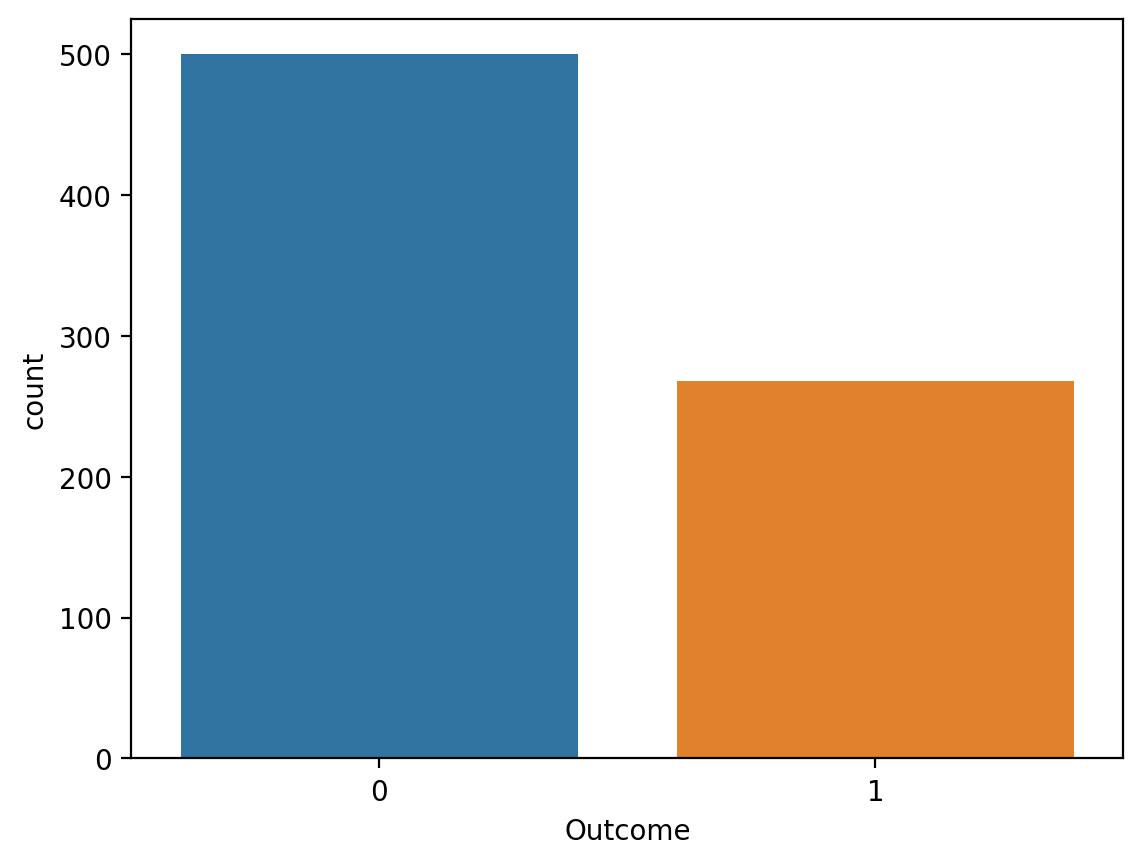

In [24]:
sns.countplot(x=data['Outcome'])
plt.show()

#### 각 데이터별, 상관관계 확인 및 시각화 해보자
```
# 상관관계 확인
data.corr()

# 시각화
sns.heatmap(data.corr(),
           annot = True,
           cmap = 'Blues',
           fmt='.2f')
plt.show()

- annot : 글자 표시
- cmap : 색상표
- fmt : 포맷형식(숫자 얼만큼 나오게 할지)
- square : 정사각형 만들지 말지
- annot_kws : 키워드별 수정사항
```

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


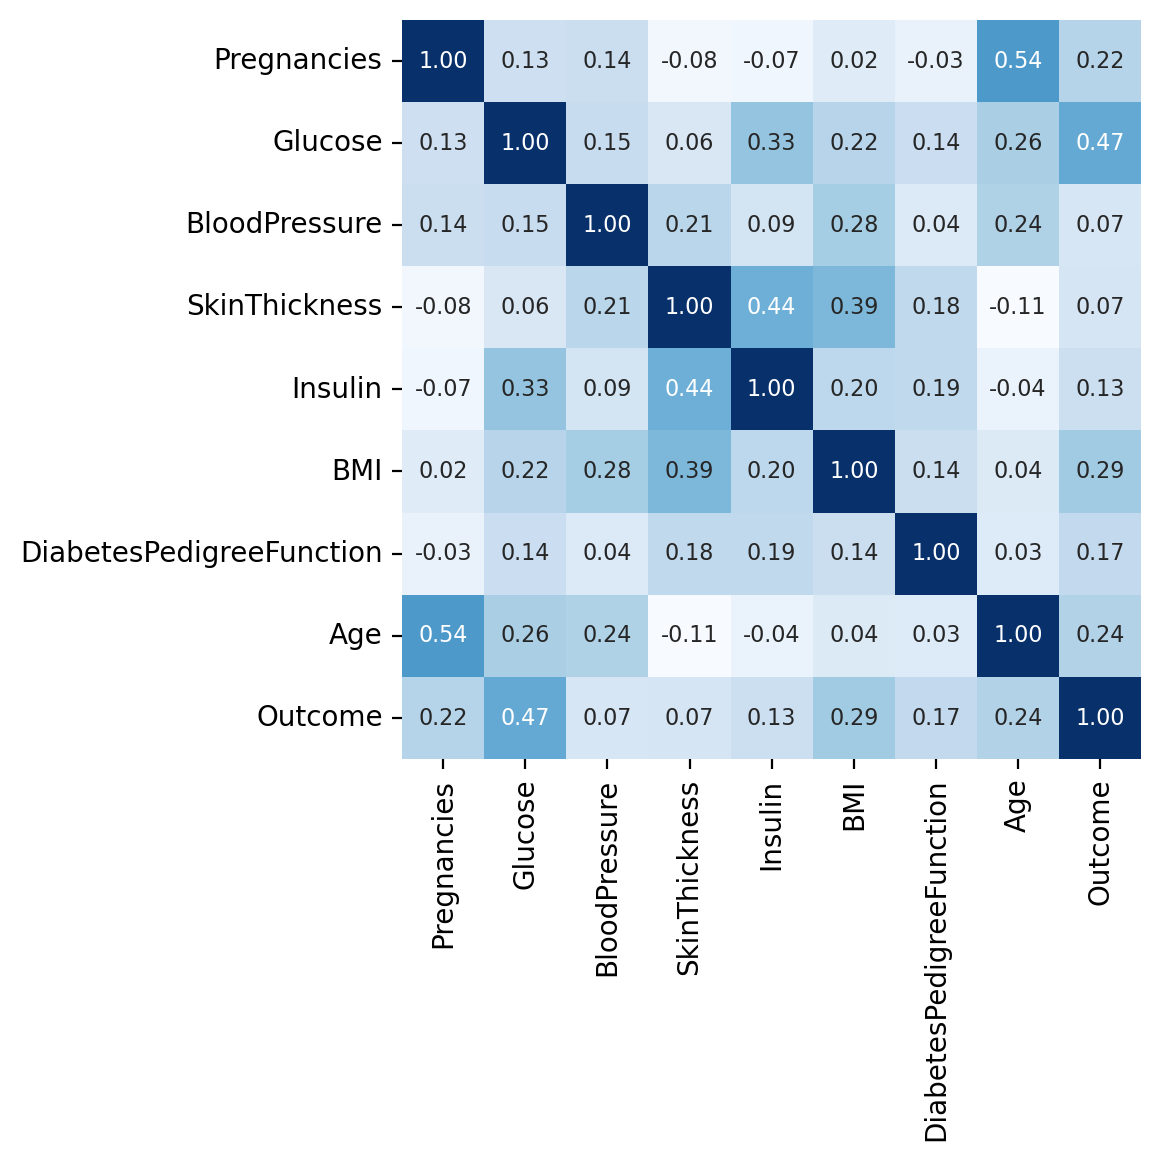

In [25]:
display(data.corr())
sns.heatmap(data.corr(),
           annot = True,
           cmap = 'Blues',
           fmt='.2f',
           cbar=False,
           square=True,
           annot_kws={'size':8})
plt.show()

# 2. 데이터 준비하기
전처리 과정을 통해 머신러닝 알고리즘에 사용할 수 있는 형태의 데이터를 준비한다.
1. 결측치 처리
2. x, y 분리
3. 학습용 평가용 데이터 분리
4. 정규화

#### 1. 결측치 처리
```
data.isna().sum() # 결측치 몇개인지 보기
data.fillna(method='ffill'm inplace=True) # 전날 값으로 결측치 채우기
```

In [26]:
data.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

#### 2. x, y 분리
- target 변수를 명확히 지정한다. : Outcome
- target을 제외한 변수를 x 데이터프레임으로 선언
- y데이터프레임은 target변수만을 가진다

In [27]:
# target 확인
target = 'Outcome'

# 데이터 분리
x = data.drop(target, axis=1)
y = data.loc[:, target]

#### 3. 학습용, 평가용 데이터 분리
- 학습용, 평가용 데이터를 적절한 비율로 분리한다.
- 반복 실행 시 동일한 결과를 얻기 위해 random_state 옵션을 지정한다.

In [28]:
# 모듈 불러오기
from sklearn.model_selection import train_test_split

# 학습용 : 테스트용을 7:3 비율로 분리한다.
# train_test_split의 경우 데이터를 섞은 후, 분리한다.
# 그렇기 때문에 random_state 설정이 없을 경우 테스트 때마다 결과값이 달라질 수 있다.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

In [29]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(537, 8)
(231, 8)
(537,)
(231,)


In [30]:
x_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
88,15,136,70,32,110,37.1,0.153,43
467,0,97,64,36,100,36.8,0.600,25
550,1,116,70,28,0,27.4,0.204,21
147,2,106,64,35,119,30.5,1.400,34
481,0,123,88,37,0,35.2,0.197,29


#### 4. 정규화

In [31]:
# 모듈 불러오기
from sklearn.preprocessing import MinMaxScaler

# 정규화
scaler = MinMaxScaler()
scaler.fit(x_train)

x_train_s = scaler.transform(x_train)
x_test_s = scaler.transform(x_test)

# 3. 모델링
모델을 **선언**하고, **학습**하고, **평가**하는 과정을 진행한다

0. 문제 구분하기 -> 회귀인지 분류인지
1. 불러오기
2. 선언하기
3. 학습하기
3. 예측하기
4. 평가하기

#### 1. 불러오기
- 알고리즘 : KNeighborsClassifier
- 평가 방법 : accuracy_score

In [33]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report

#### 2. 선언하기

In [39]:
model = KNeighborsClassifier() # 정규화 안한 모델을 저장할 모델
model_s = KNeighborsClassifier() # 정규화 할 모델을 저장할 모델

#### 3. 학습하기

In [40]:
model.fit(x_train, y_train) # 정규화 x
model_s.fit(x_train_s, y_train) # 정규화 o

KNeighborsClassifier()

#### 4. 예측하기

In [41]:
y_pred = model.predict(x_test)
y_pred_s = model_s.predict(x_test_s)

print(f"정규화 안한 예측값 : {y_pred[:10]}") # 정규화 안한 예측값 10개 보기
print(f"정규화 한 예측 값 : {y_pred_s[:10]}") # 정규화 한 예측값 10개 보기
print(f"실제값 : {y_test.values[:10]}") # 실제값 10개 보기

정규화 안한 예측값 : [1 1 0 0 0 0 0 0 0 0]
정규화 한 예측 값 : [1 0 0 0 0 0 0 0 0 0]
실제값 : [0 0 0 0 0 0 0 0 0 0]


#### 5. 평가하기

**1) Confusion Matrix**

In [42]:
# 모듈 불러오기
from sklearn.metrics import confusion_matrix

# 성능 평가
print(f"정규화 안한 {confusion_matrix(y_test, y_pred)}")
print(f"정규화 한 {confusion_matrix(y_test, y_pred_s)}")

정규화 안한 Accuracy[[128  18]
 [ 35  50]]
정규화 한 Accuracy[[129  17]
 [ 35  50]]


**2) Accuracy**

$$\large Accuracy = \frac{TP+TN}{TP+TN+FP+FN}$$

In [43]:
# 모듈 불러오기
from sklearn.metrics import accuracy_score

# 성능 평가
print(f"Accuracy{accuracy_score(y_test, y_pred)}")
print(f"Accuracy{accuracy_score(y_test, y_pred_s)}")

Accuracy0.7705627705627706
Accuracy0.7748917748917749


**3) Precision**

$$\large Precision = \frac{TP}{TP+FP}$$

In [44]:
# 모듈 불러오기
from sklearn.metrics import precision_score

# 성능 평가
print(f"정규화 안한 Precision {precision_score(y_test, y_pred)}")
print(f"정규화 한 Precision {precision_score(y_test, y_pred_s)}")

정규화 안한 Precision 0.7352941176470589
정규화 한 Precision 0.746268656716418


**4) Recall**

$$\large Recall = \frac{TP}{TP+FN}$$

In [45]:
# 모듈 불러오기
from sklearn.metrics import recall_score

# 성능 평가
print(f"정규화 안한 Recall{recall_score(y_test, y_pred)}")
print(f"정규화 한 Recall{recall_score(y_test, y_pred_s)}")

정규화 안한 Recall0.5882352941176471
정규화 한 Recall0.5882352941176471


**5) F1-Score**

$$\large F1 = \frac{2\times Precision\times Recall}{Precision+Recall}$$

In [46]:
# 모듈 불러오기
from sklearn.metrics import f1_score

# 성능 평가
print(f"정규화 안한 F1-Score{f1_score(y_test, y_pred)}")
print(f"정규화 한 F1-Score{f1_score(y_test, y_pred_s)}")

정규화 안한 F1-Score0.65359477124183
정규화 한 F1-Score0.6578947368421053


**6) Classification Report**

In [47]:
# 모듈 불러오기
from sklearn.metrics import classification_report

# 성능 평가
print(f"정규화 안한 Report{classification_report(y_test, y_pred)}")
print(f"정규화 한 Report{classification_report(y_test, y_pred_s)}")

정규화 안한 Report              precision    recall  f1-score   support

           0       0.79      0.88      0.83       146
           1       0.74      0.59      0.65        85

    accuracy                           0.77       231
   macro avg       0.76      0.73      0.74       231
weighted avg       0.77      0.77      0.76       231

정규화 한 Report              precision    recall  f1-score   support

           0       0.79      0.88      0.83       146
           1       0.75      0.59      0.66        85

    accuracy                           0.77       231
   macro avg       0.77      0.74      0.75       231
weighted avg       0.77      0.77      0.77       231

